<a href="https://colab.research.google.com/github/among5094/Big-Data-Integrated-Analysis/blob/main/week12_CH10_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%87%BC%ED%95%91%EB%AA%B0_%ED%9A%8C%EC%9B%90%EA%B4%80%EB%A6%AC/week12_CH10_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%87%BC%ED%95%91%EB%AA%B0_%ED%9A%8C%EC%9B%90%EA%B4%80%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH010 회귀분석 - 클러스터링을 활용한 쇼핑몰 회원 관리

날짜: 05월 26일 월요일

### 10.1 클러스터링

##### 10.1.(1) K-Means 알고리즘

class sklearn.cluster.KMeans 모델 사용 방법

In [3]:
from sklearn.cluster import KMeans
import numpy as np

# 학습 데이터 정의 (6개의 2차원 좌표)
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# KMeans 모델 생성 (2개의 클러스터로 나누기)
kmeans = KMeans(n_clusters=2)

# 모델 학습
kmeans.fit(X)

# 각 데이터가 속한 클러스터(0 또는 1)
# KMeans가 데이터의 특성을 보고 자체적으로 군집을 나눈 결과
print(f'클러스터 번호: {kmeans.labels_}')

# 각 클러스터의 중심 좌표
print(f'중심점: {kmeans.cluster_centers_}')

# 응집도(Inertia): 클러스터 내 거리 제곱합 (작을수록 좋음)
print(f'응집도: {kmeans.inertia_}')

# score(): 음의 응집도를 반환 (-inertia_)
print(kmeans.score(X))


클러스터 번호: [1 1 1 0 0 0]
중심점: [[10.  2.]
 [ 1.  2.]]
응집도: 16.0
-16.0


**최적의 K값 찾기!!**
- ① KMeans 클래스의 속성 중 inertia(응집도)를 사용하는 elbow 방법
- ② yellowbrick에서 제공하는 KElbowVisualizer 를 사용하는 방법

- ① 응집도를 활요한 Elbow 를 사용하는 방법
- 결과: 클러스터 수 3이 지점부터 응집도의 값 변화가 거의 없기 때문에 3이 적절한 클러스터 수(k)이다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


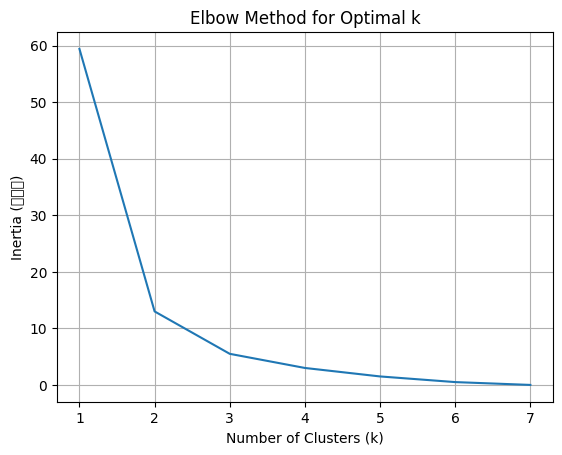

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 데이터: 2차원 좌표 (총 6개 샘플)
fruit = np.array([[3, 4], [1, 5], [7, 9], [5, 4], [6, 8], [2, 3], [4, 4]])

temp = []  # 각 군집 수에 대한 응집도(inertia)를 저장할 리스트

# 군집 수를 1부터 7까지 바꾸어가며 모델 학습
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)  # i개의 클러스터로 모델 생성
    kmeans.fit(fruit)              # 학습
    temp.append(kmeans.inertia_)  # 응집도(inertia_) 저장

# 군집 수(k)에 따른 응집도 시각화
plt.plot(range(1, 8), temp)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (응집도)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


- ② KElbowVisualizer 를 사용하는 방법
- 결과: k값에 따른 각 지점에서 중심점까지의 거리에 대한 제곱합(오차제곱의 합) 은 파란색으로, 훈련하는 데 걸리는 시간은 초록색으로 표시함
- 적절한 k값은 점선으로 표시

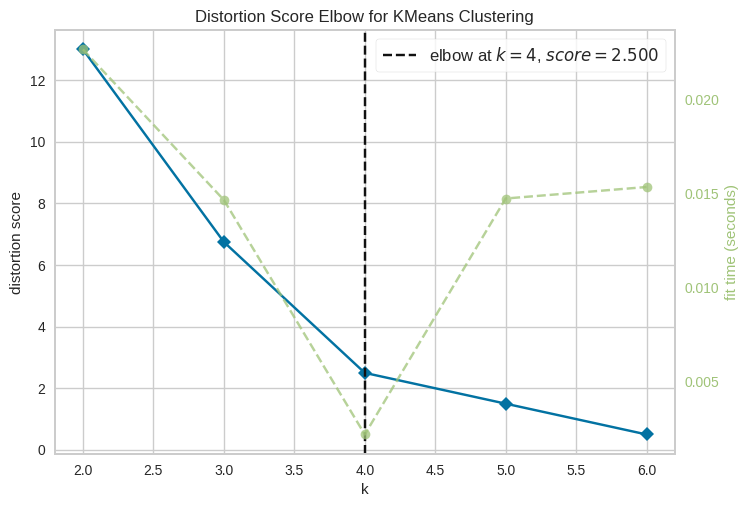

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.cluster import KMeans # KMeans 알고리즘 불러오기
import numpy as np # 넘파이: 수치 데이터 처리
import matplotlib.pyplot as plt # (사용은 안 했지만) 시각화 라이브러리 불러오기
from yellowbrick.cluster import KElbowVisualizer # 엘보우 시각화 도구 불러오기

# 2차원 데이터 (과일 예시 데이터)
fruit = np.array([[3, 4], [1, 5], [7, 9],
                  [5, 4], [6, 8], [2, 3], [4, 4]])

# KMeans 기반의 ElbowVisualizer 생성, 클러스터 수 범위는 2~6까지 시도
visualizer = KElbowVisualizer(KMeans(), k=(2, 7))

# 학습 데이터로 모델 학습 및 클러스터 평가
visualizer.fit(fruit)

# Elbow 그래프 출력
visualizer.show()


##### 10.1.(2)  Hierarchical clustering 알고리즘
- 비슷한 군집끼리 묶어가면서 최종적으로 하나의 군집으로 묶여 질 때까지 군집을 묶어나가는 알고리즘
- K-Means와 다르게 군집의 수를 미리 정하지 않아도 됨

- 신맛과 단맛의 과일 데이터셋으로 dendrogram, linkage 사용 예
- 클러스터 간의 차이가 분명한 선으로 계층을 나누는 것이 적절하

Text(0, 0.5, 'Sweet taste')

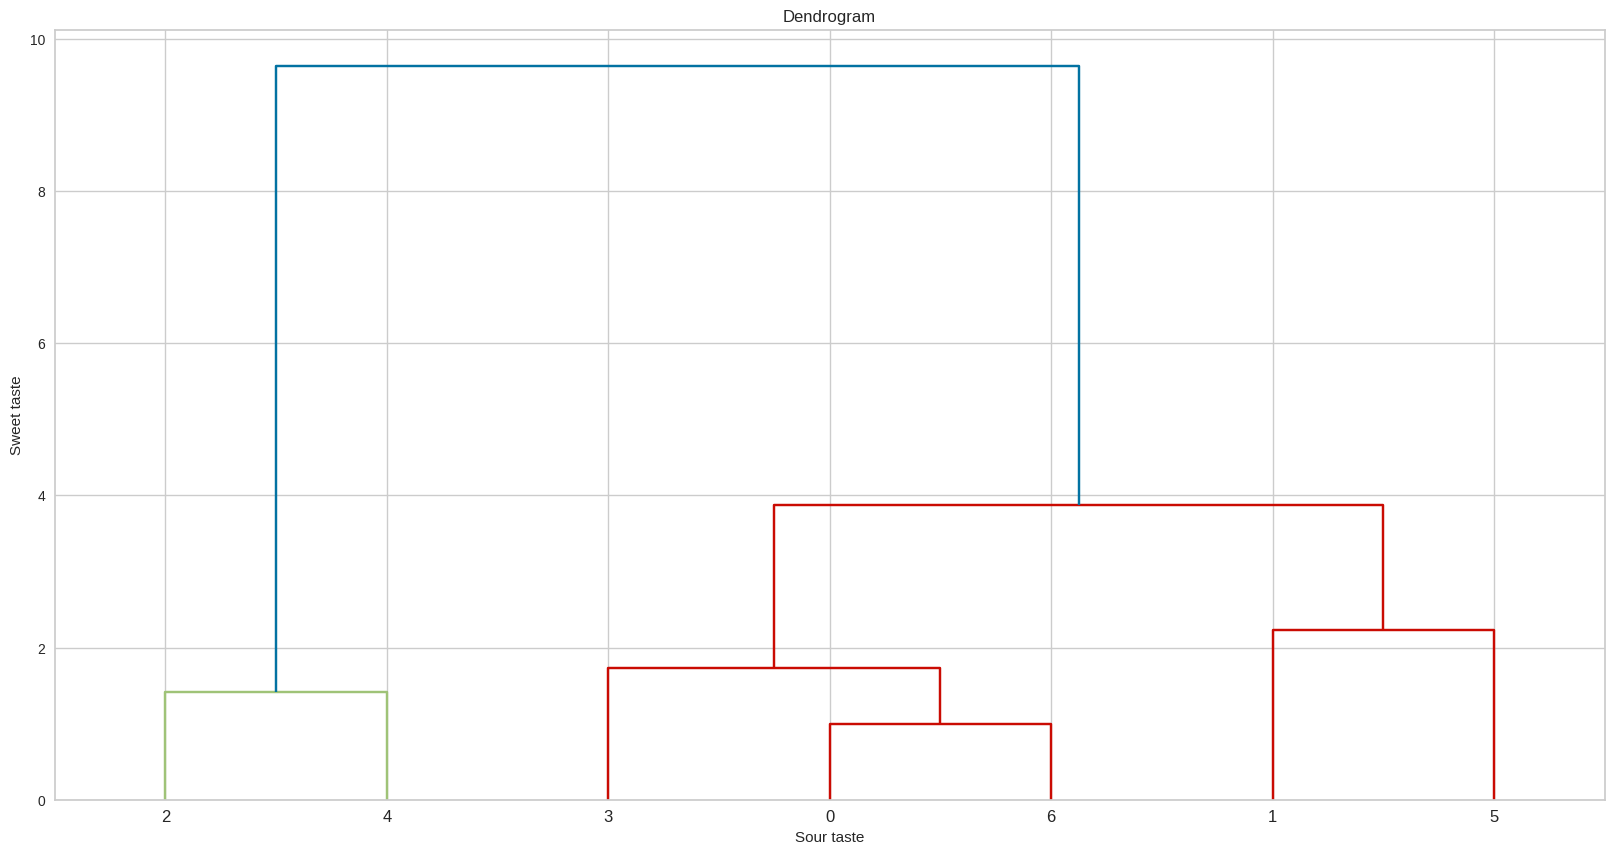

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage   # 계층적 군집화 함수 불러오기
from matplotlib import pyplot as plt                      # 시각화 라이브러리

# 신맛과 단맛으로 표현된 과일 데이터 (2차원 좌표)
fruit = np.array([[3, 4], [1, 5], [7, 9],
                  [5, 4], [6, 8], [2, 3], [4, 4]])

plt.figure(figsize=(20, 10))                              # 그래프 크기 설정 (가로 20, 세로 10)

# linkage() 함수로 클러스터 간의 거리 계산 ('ward'는 분산 최소화 방식)
cluster = linkage(fruit, method='ward')

# 덴드로그램 그리기
dendrogram = dendrogram(cluster)

plt.title('Dendrogram')              # 그래프 제목
plt.xlabel('Sour taste')             # x축 레이블
plt.ylabel('Sweet taste')           # y축 레이블


- 덴드로그램(Dendrogram)을 통해 계층 군집의 클러스터 수를 알아낸 후, 그 다음 단계는 알아낸 클러스터의 개수로 그룹화하는 것

In [10]:
from sklearn.cluster import AgglomerativeClustering  # 계층적 군집화 클래스
import numpy as np                                   # 배열 생성을 위한 라이브러리

# 신맛과 단맛에 대한 과일 2차원 데이터
fruit = np.array([[3, 4], [1, 5], [7, 9],
                  [5, 4], [6, 8], [2, 3], [4, 4]])

# AgglomerativeClustering 객체 생성
# 클러스터 수: 2개, 거리 기준: 유클리디언, 결합 방식: ward (분산 최소화)
cluster = AgglomerativeClustering(n_clusters=2,
                                  metric='euclidean', # 거리 계산은 유클리디안 방식으로
                                  linkage='ward')

# 학습과 동시에 클러스터 예측 (0 또는 1 라벨이 붙음)
cluster.fit_predict(fruit)

array([0, 0, 1, 0, 1, 0, 0])

### 10.2 클러스터링을 활용한 쇼핑몰 회원 관리

#### (1) 데이터 읽기

In [11]:
from google.colab import drive
drive.mount('/content/Drive/')

Drive already mounted at /content/Drive/; to attempt to forcibly remount, call drive.mount("/content/Drive/", force_remount=True).


#### (2) 데이터 가져오기

In [15]:
#  파일 읽어오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('/content/Drive/MyDrive/data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### (3) 데이터 정보 확인하기

In [16]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- 1) 나이 분포 확인

<ipython-input-18-73c6b59fc829>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=20)      # bins=20: 구간(막대 수) 20개로 나눔


Text(0.5, 1.0, 'Distplot of Age')

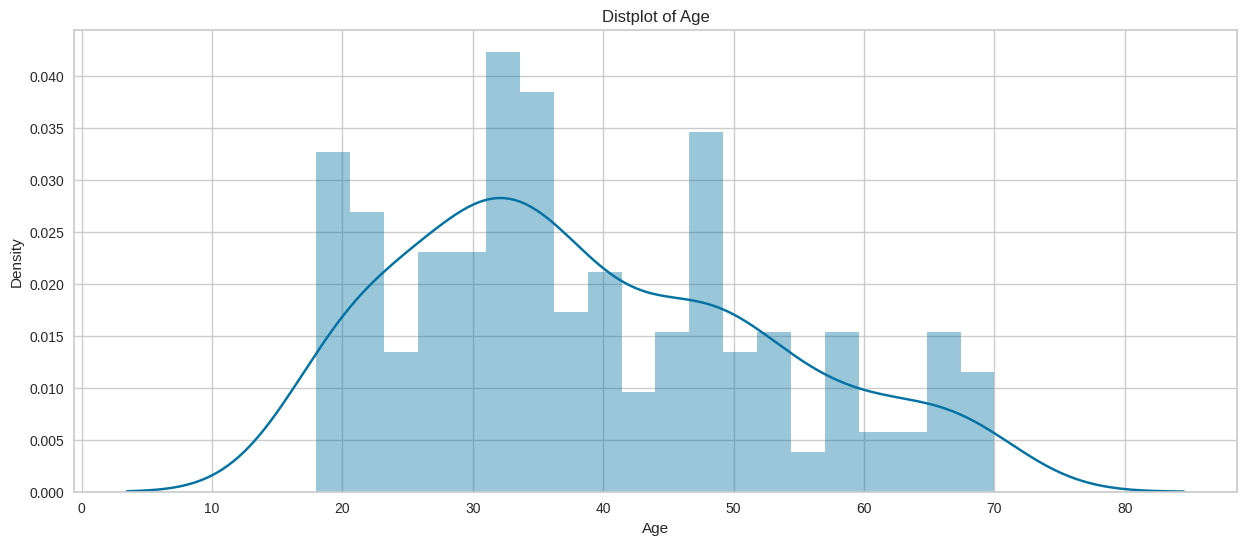

In [18]:
import matplotlib.pyplot as plt        # 기본 시각화 도구
import seaborn as sns                 # 통계적 시각화 도구

plt.figure(1, figsize=(15, 6))        # 그래프 크기 설정 (가로 15, 세로 6)

# 나이 분포 시각화 (히스토그램 + KDE)
sns.distplot(df['Age'], bins=20)      # bins=20: 구간(막대 수) 20개로 나눔

plt.title('Distplot of Age')         # 그래프 제목


- 2) 연간 소득 히스토그램

<ipython-input-19-90e1016121d4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'], bins=20)  # 연간 소득 분포 (20구간)


Text(0.5, 1.0, 'Distplot of Age')

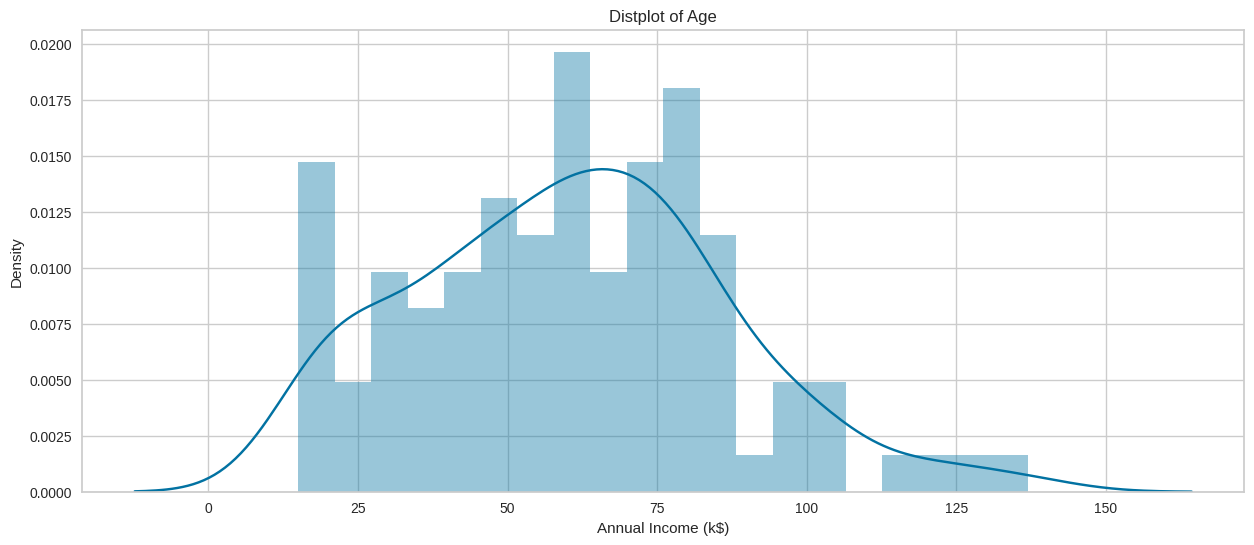

In [19]:
import matplotlib.pyplot as plt         # 시각화 라이브러리
import seaborn as sns                  # 통계 시각화 라이브러리

plt.figure(1, figsize=(15, 6))         # 그래프 크기 설정
sns.distplot(df['Annual Income (k$)'], bins=20)  # 연간 소득 분포 (20구간)
plt.title('Distplot of Age')           # 👉 제목 오타: 'Income'으로 수정 필요


- 쇼핑몰 점수 분포 시각화

<ipython-input-20-a684cbcc9352>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'], bins=20)


Text(0.5, 1.0, 'Distplot of Spending Score')

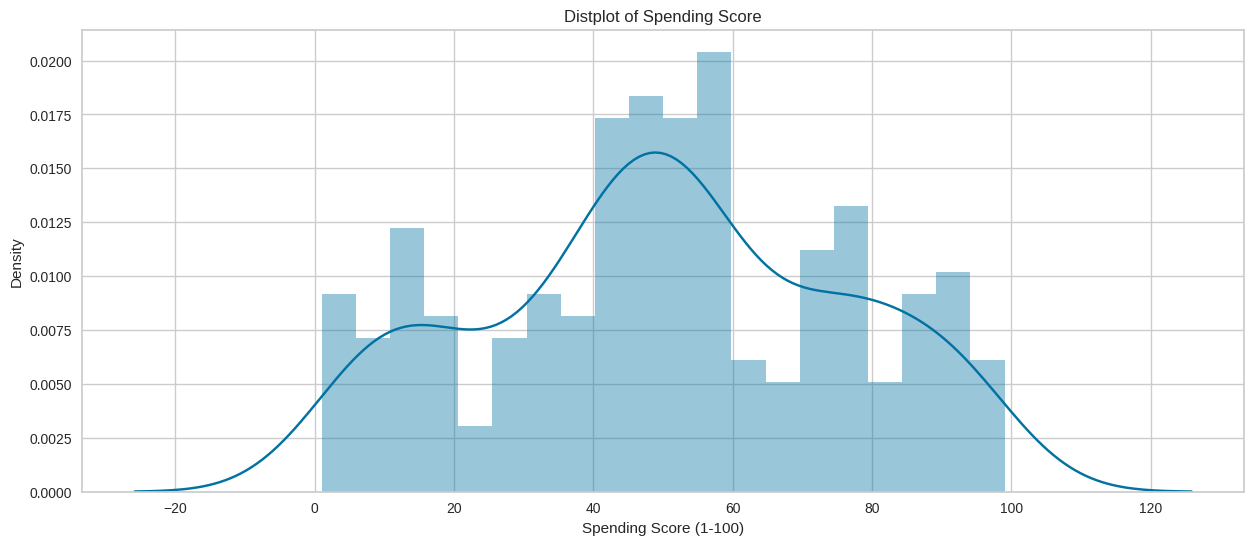

In [20]:
# import matplotlib.pyplot as plt        # 이미 임포트됨
# import seaborn as sns                 # 이미 임포트됨

plt.figure(1, figsize=(15, 6))
sns.distplot(df['Spending Score (1-100)'], bins=20)
plt.title('Distplot of Spending Score')


- 성별에 따른 데이터 분포 시각화

In [22]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


Genre
Female    112
Male       88
Name: count, dtype: int64


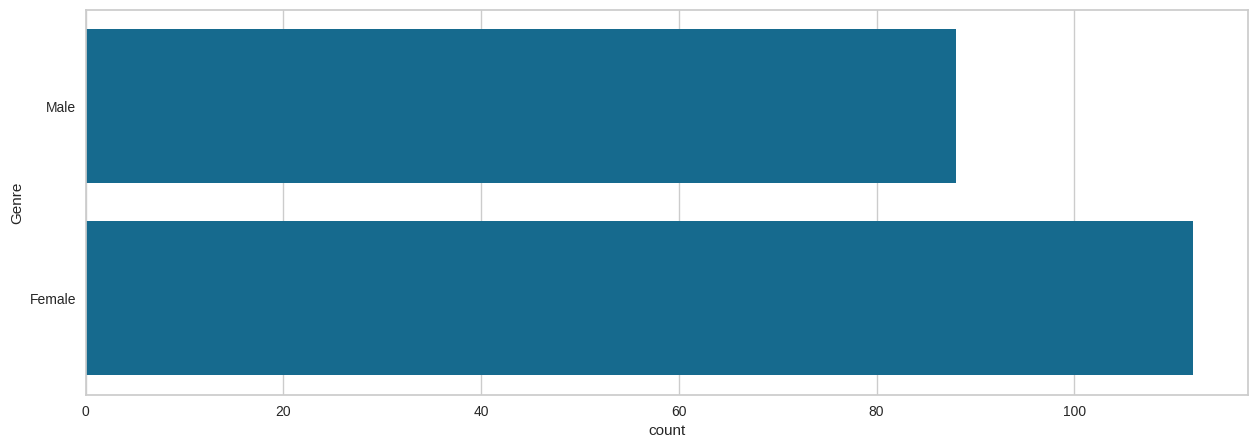

In [23]:
plt.figure(1, figsize=(15, 5))                          # 그래프 크기 설정
sns.countplot(y='Genre', data=df)                     # 성별 개수 시각화 (가로 막대)
print(df['Genre'].value_counts())                     # 성별 분포 수치로 확인


- K-means를 이용한 군집화 진행
- ① 고객 세분화를 위한 최적의 k 찾기

**나이와 쇼핑몰 점수로 최적의 k 찾기**

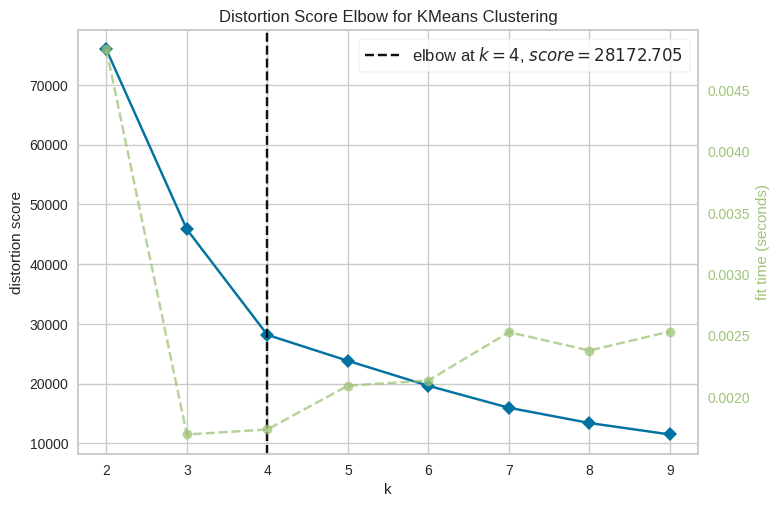

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values  # 클러스터링 모델과 시각화

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()


**연간 소득과 쇼핑몰 점수로 최적의 k 찾기**

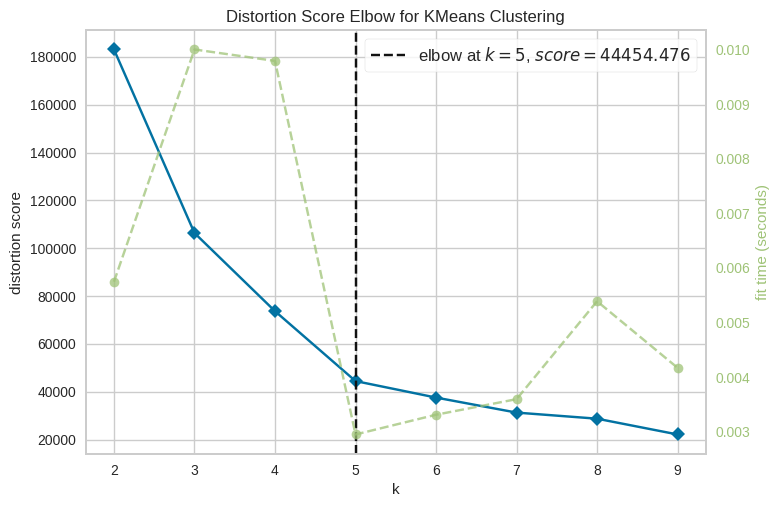

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()


**나이와 연간 소득과 쇼핑몰 점수로 최적의 k 찾기**

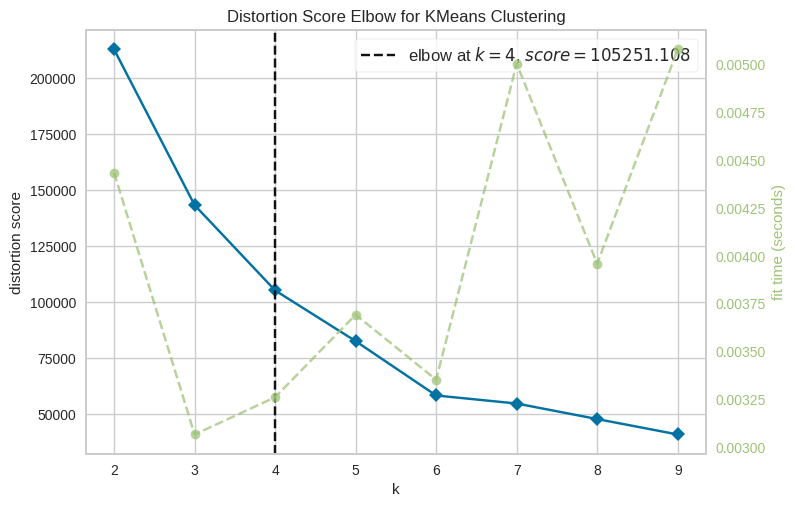

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values  # 클러스터링 모델과 시각화

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()


K-means를 이용한 군집화

모델 생성과 학습
- 나이와 쇼핑몰 점수로 세분화한 고객 클러스터

In [28]:
data = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values

algorithm = KMeans(n_clusters=4)
algorithm.fit(data)

labels1 = algorithm.labels_
df['label1'] = labels1

df.head(20)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
5,6,Female,22,17,76,1
6,7,Female,35,18,6,2
7,8,Female,23,18,94,1
8,9,Male,64,19,3,2
9,10,Female,30,19,72,1


각 클러스터의 특징 살펴보기

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

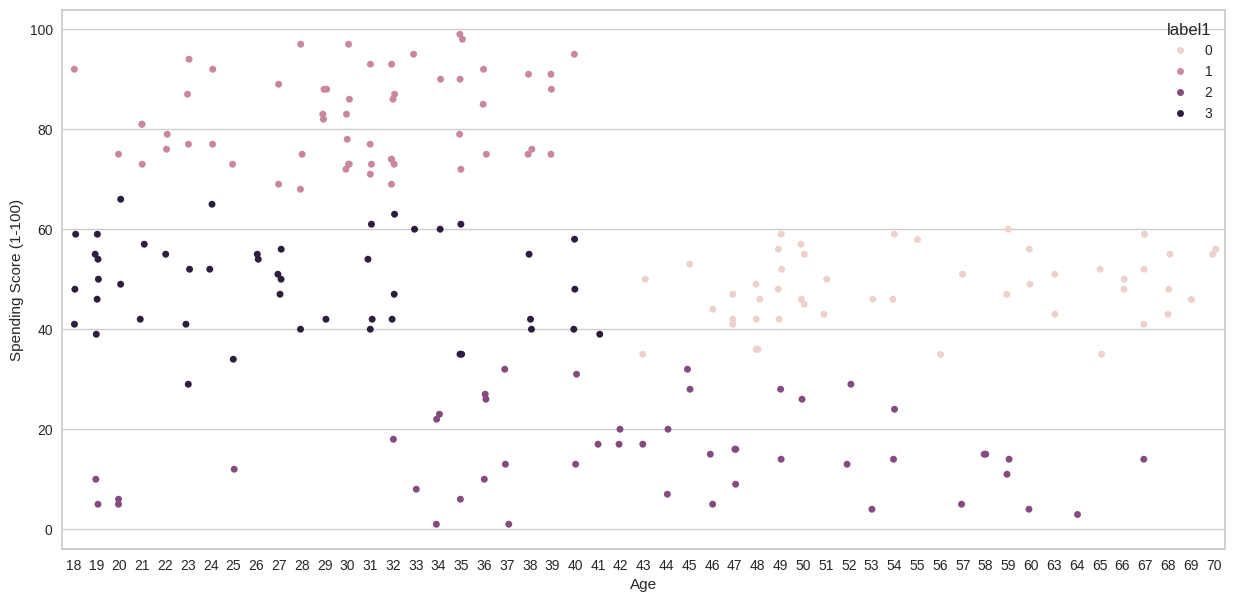

In [29]:
plt.figure(figsize=(15,7))
sns.stripplot(x='Age', y='Spending Score (1-100)', data=df,
              hue='label1', jitter=True)


② 모델 생성과 학습 - 연간 소득과 쇼핑몰 점수로 세분화한 고객 클러스터

연간 소득과 쇼핑몰 점수로 모델 생성과 학습

In [30]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

algorithm = KMeans(n_clusters = 5)
algorithm.fit(data)

labels2 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

df['label2'] = labels2

df.head(20)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1,label2
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,3,3
5,6,Female,22,17,76,1,4
6,7,Female,35,18,6,2,3
7,8,Female,23,18,94,1,4
8,9,Male,64,19,3,2,3
9,10,Female,30,19,72,1,4


각 클러스터의 특징 살펴보기 (시각화)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

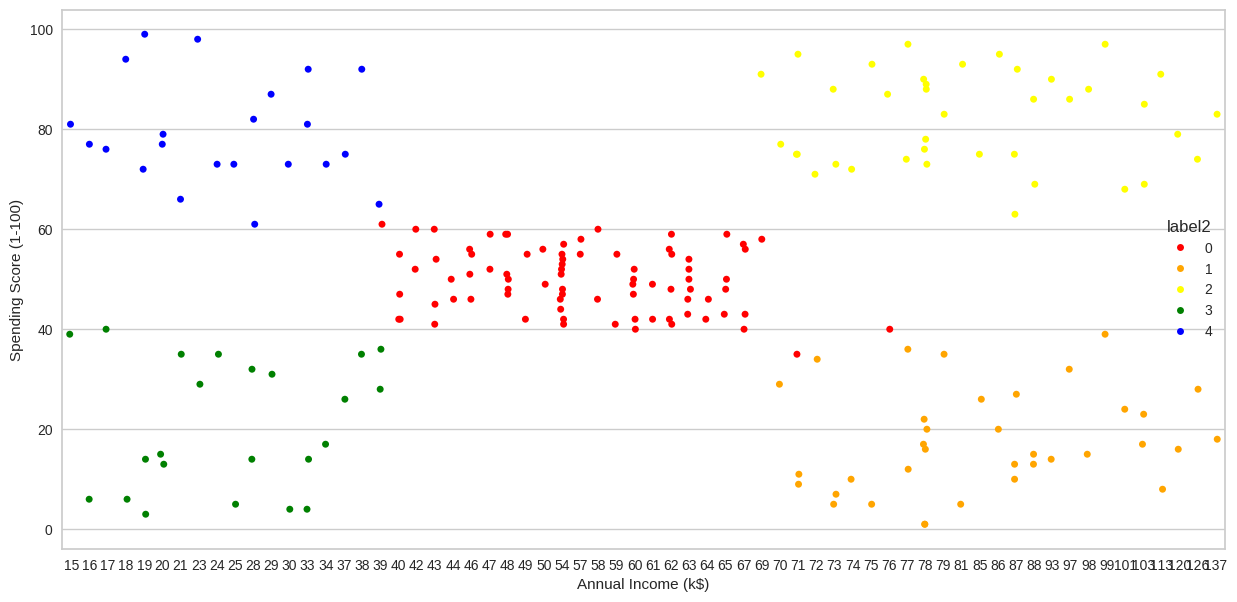

In [32]:
plt.figure(figsize = (15, 7))
sns.stripplot(x='Annual Income (k$)', y='Spending Score (1-100)',
              data=df, hue='label2', jitter=True,
              palette=['red', 'orange', 'yellow', 'green', 'blue'])


② 모델 생성과 학습
- 나이와 연간 소득과 쇼핑몰 점수로 세분화한 고객 클러스터

In [33]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

algorithm = KMeans(n_clusters = 5)
algorithm.fit(data)

label3 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

df['label3'] = label3

df.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,1,4,3
2,3,Female,20,16,6,2,3,4
3,4,Female,23,16,77,1,4,3
4,5,Female,31,17,40,3,3,4
5,6,Female,22,17,76,1,4,3
6,7,Female,35,18,6,2,3,4
7,8,Female,23,18,94,1,4,3
8,9,Male,64,19,3,2,3,4
9,10,Female,30,19,72,1,4,3


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

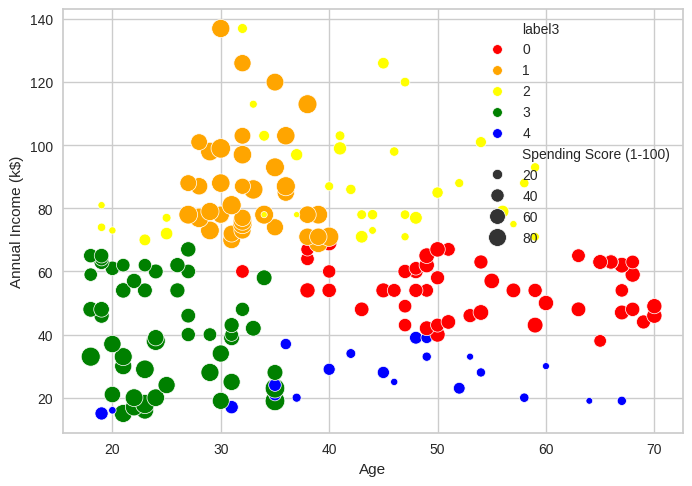

In [35]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='label3',
                size='Spending Score (1-100)',
                data=df,  palette=['red', 'orange', 'yellow', 'green', 'blue'],
                sizes=(20, 200))


K-Means 모델을 이용한 예측값 확인

In [36]:
algorithm.predict([[19, 15, 39]])  # 샘플 고객 군집 예측

data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

df['label3_pred'] = algorithm.predict(data)
df[['label3', 'label3_pred']].head(10)


,label3,label3_pred
0,4,4
1,3,3
2,4,4
3,3,3
4,4,4
5,3,3
6,4,4
7,3,3
8,4,4
9,3,3


 계층적 군집화를 위한 라이브러리 불러오기

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


 거리 측정 방법에 따른 Hierarchical clustering
- 가장 먼저 회원 정보 데이터를 읽어와 필요한 속성 값을 추출함

In [38]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
data.shape

(200, 3)

4) Hierarchical clustering을 이용한 군집화

- method='single'

(199, 4)


Text(0, 0.5, 'Euclidean distances')

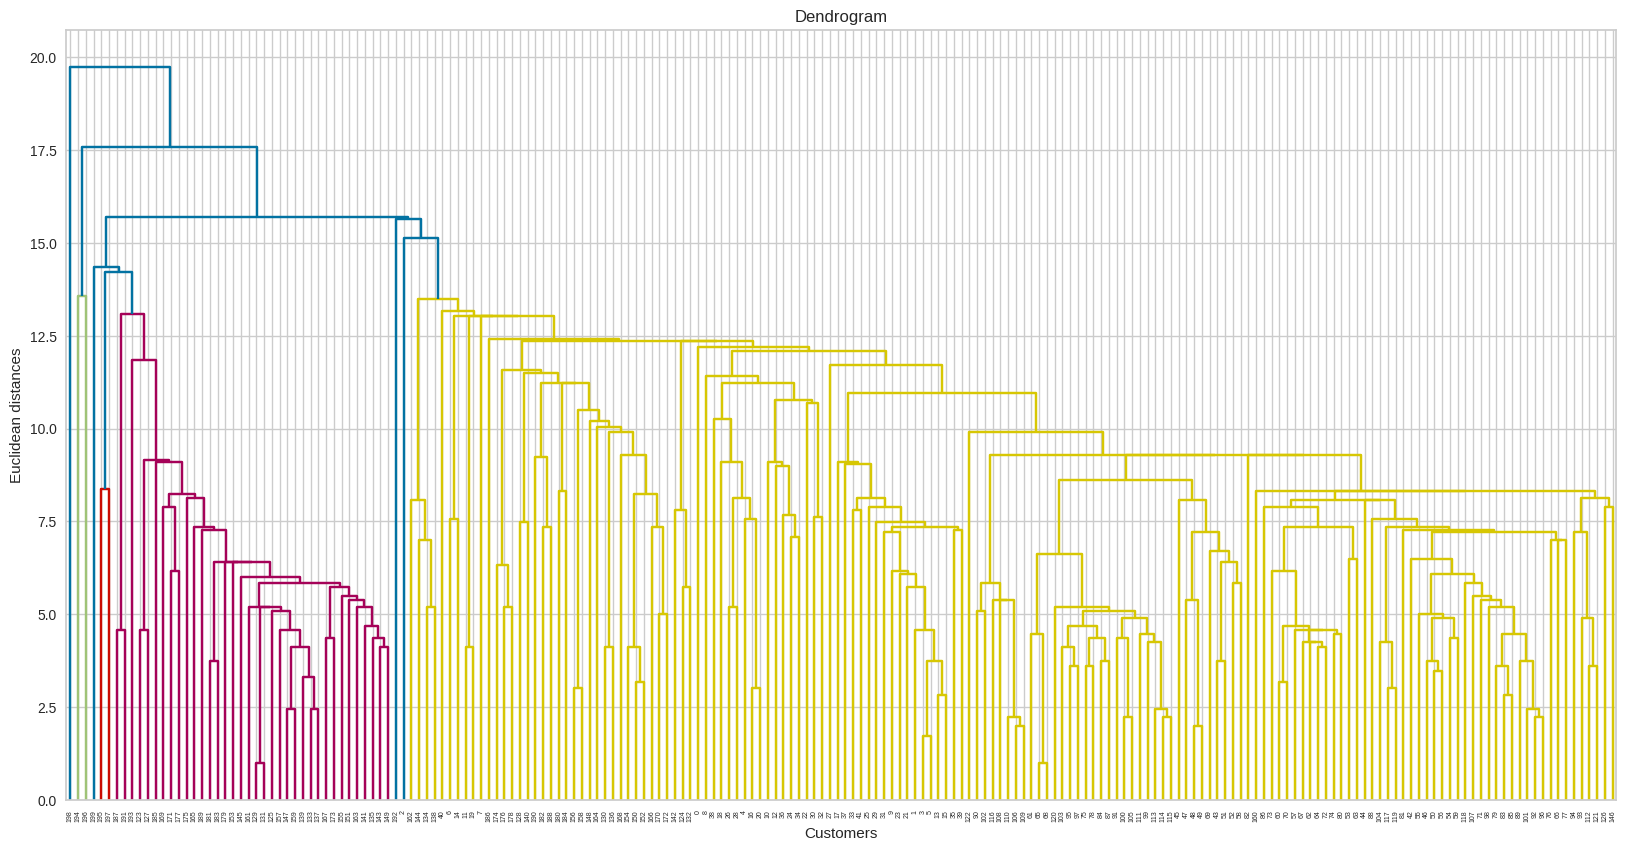

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
cluster = linkage(data, method='single')
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


-  method='complete'

(199, 4)


Text(0, 0.5, 'Euclidean distances')

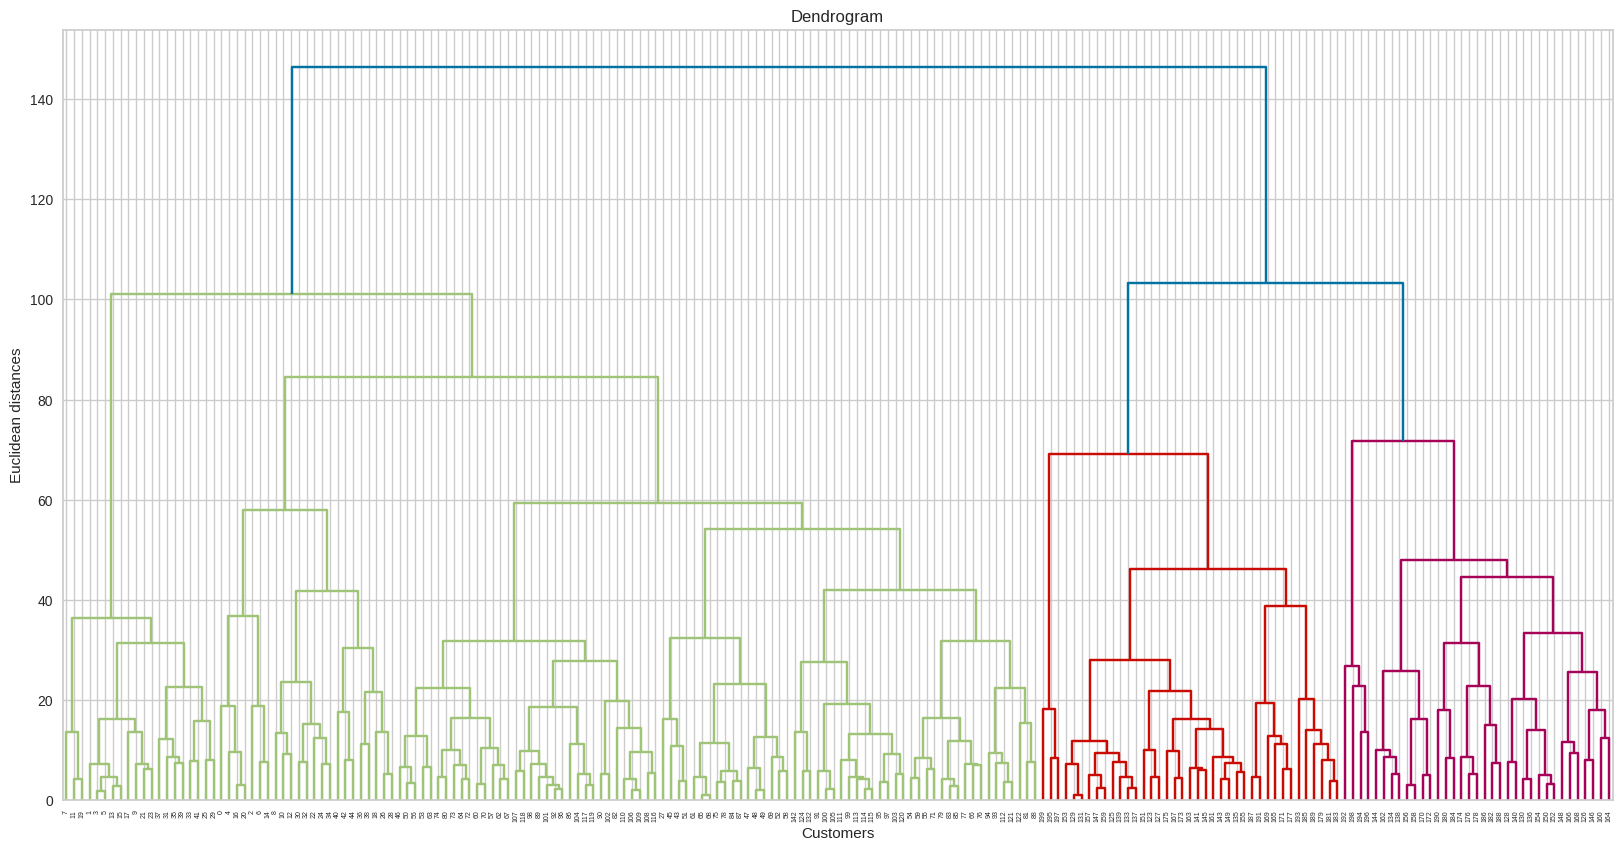

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
cluster = linkage(data, method='complete')
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


- method='average'

(199, 4)


Text(0, 0.5, 'Euclidean distances')

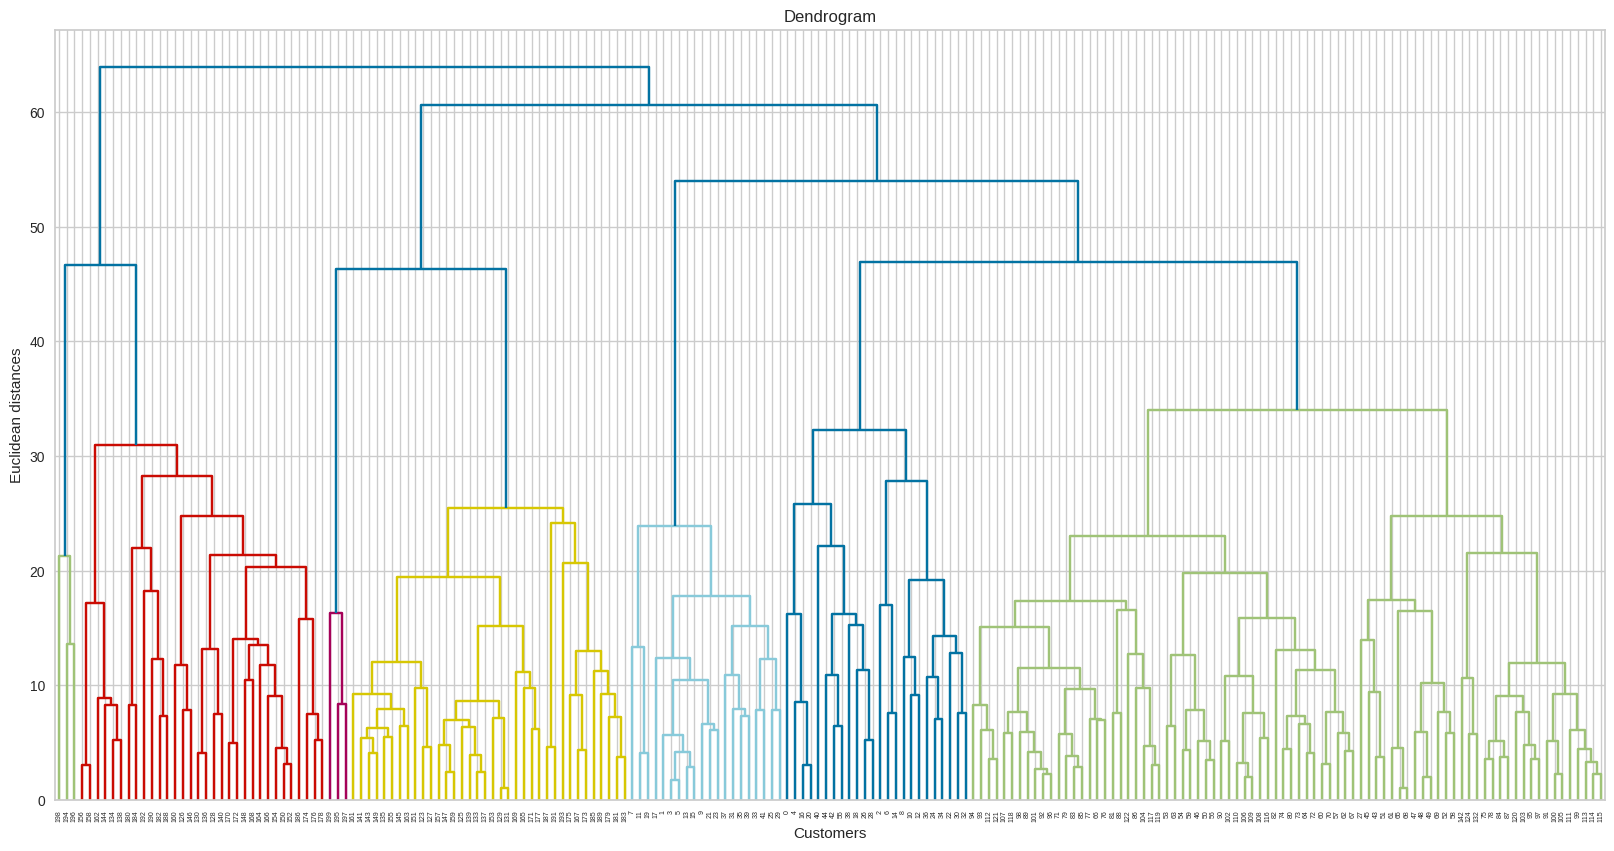

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
cluster = linkage(data, method='average')
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


-  method='ward'

Text(0, 0.5, 'Euclidean distances')

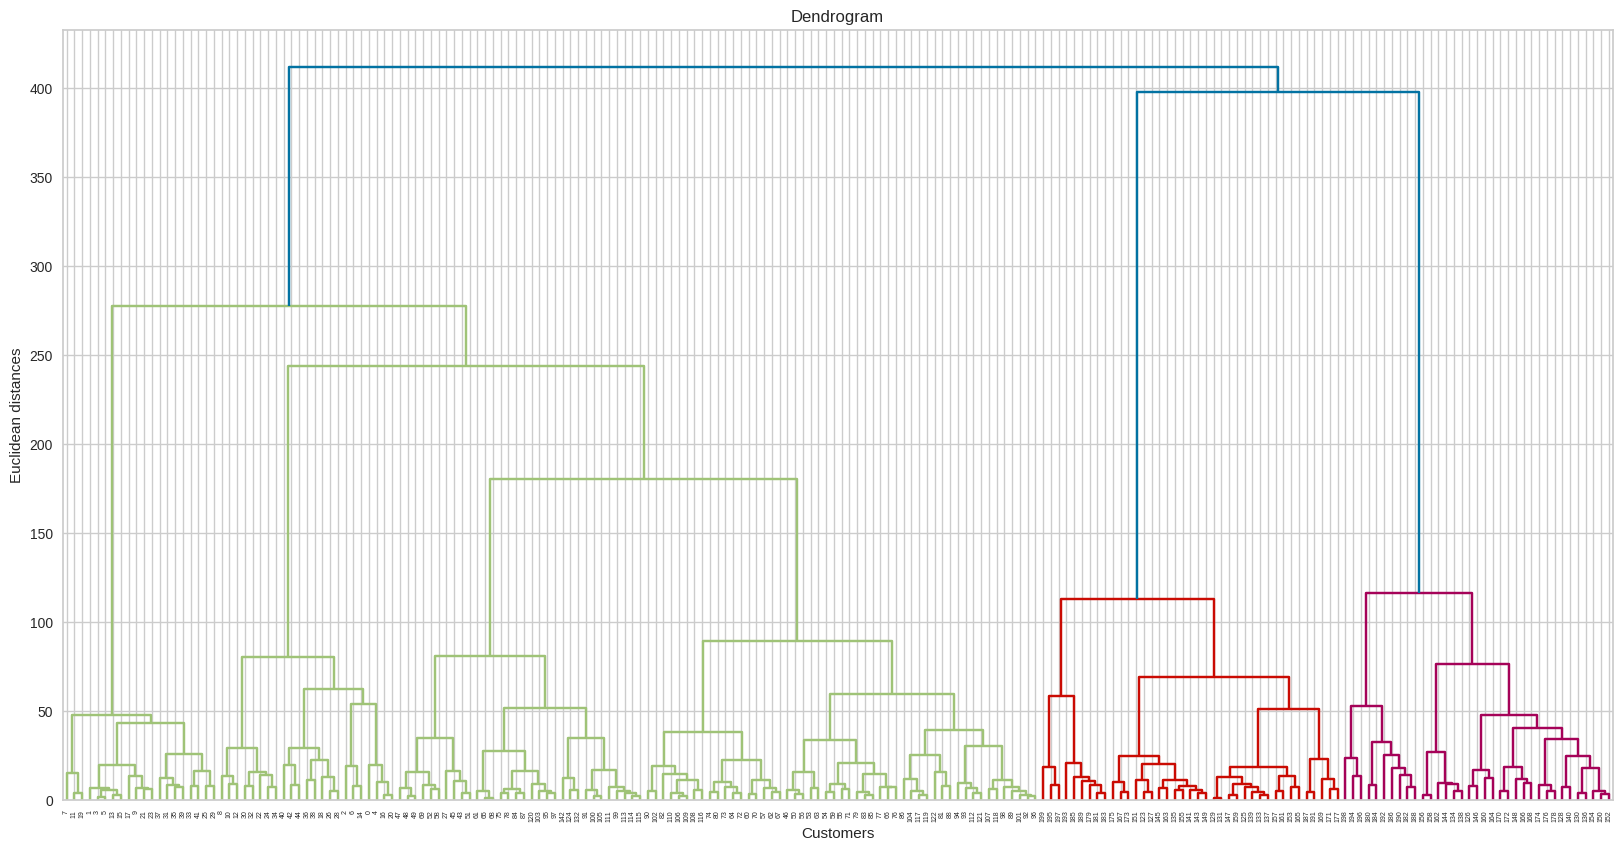

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
dendrogram = dendrogram(linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


③ 모델 학습과 시각화 - 클러스터의 수는 3,4,5 중에 하나를 선택(교재는 5를 선택)

In [44]:
from sklearn.cluster import AgglomerativeClustering

cluster_model1 = AgglomerativeClustering(n_clusters=5,
                                         metric='euclidean', linkage='ward')
cluster_label = cluster_model1.fit_predict(data)

df['label4'] = cluster_label
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3,label3_pred,label4
0,1,Male,19,15,39,3,3,4,4,4
1,2,Male,21,15,81,1,4,3,3,3
2,3,Female,20,16,6,2,3,4,4,4
3,4,Female,23,16,77,1,4,3,3,3
4,5,Female,31,17,40,3,3,4,4,4


<ipython-input-47-eea377ee4b7a>:5: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

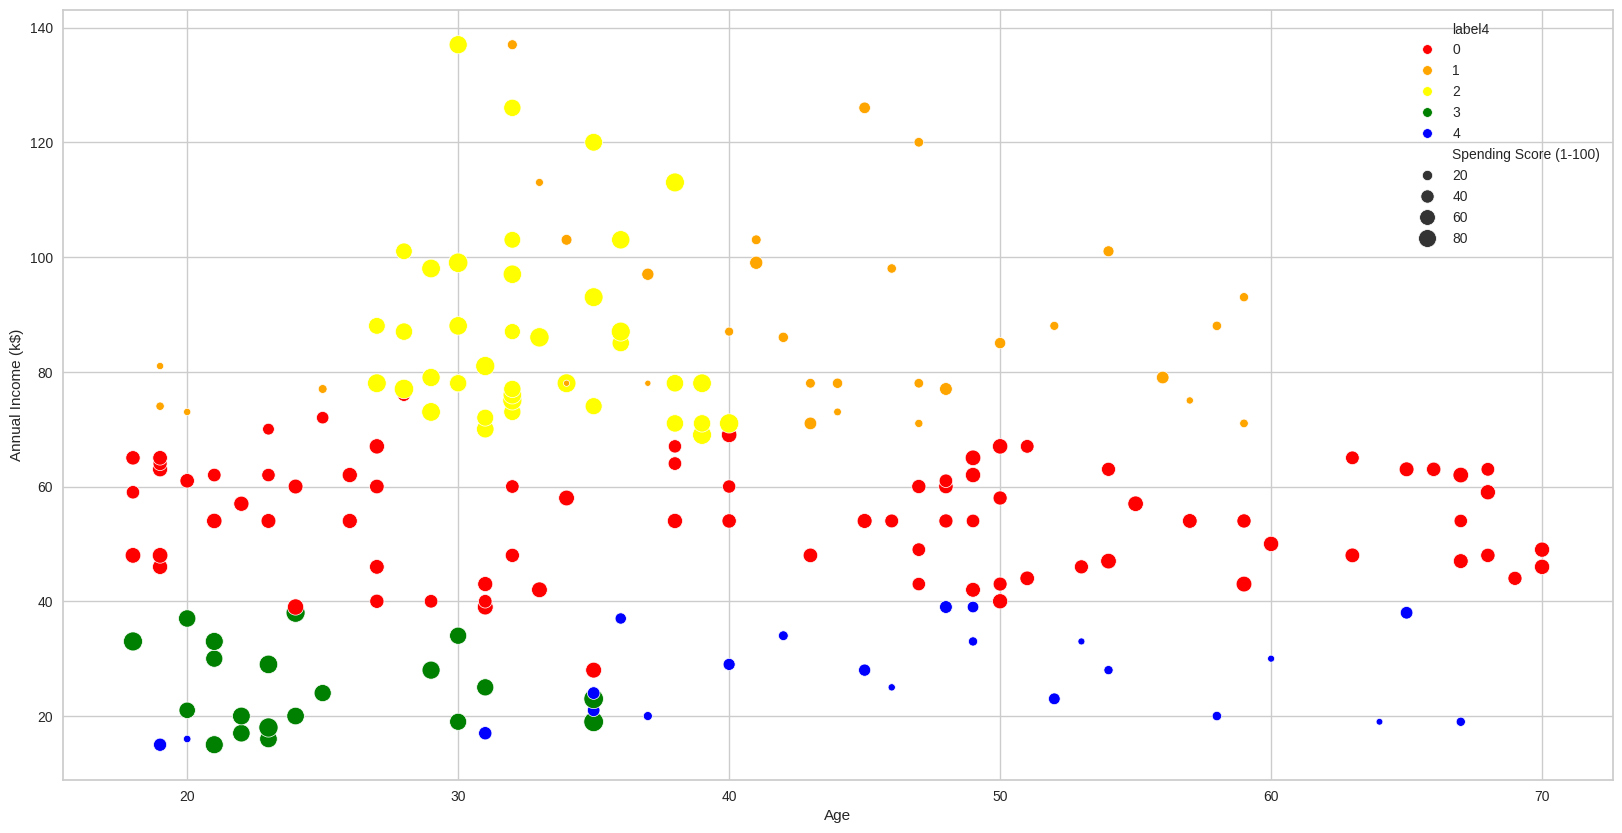

In [47]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
sns.scatterplot(
    x='Age',  y='Annual Income (k$)', hue='label4',
    size='Spending Score (1-100)',
    data=df,
    palette=['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple'],
    sizes=(20, 200)
)
